# Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, association_rules

# Load groceries dataset

In [3]:
df = pd.read_csv('Groceries_dataset.csv.zip')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# Information about Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.duplicated().any()

True

In [6]:
df[df.duplicated()]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [7]:
#drop duplicated values
df1 = df.drop_duplicates()
df1

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [8]:
# change dtype of Date
df1['Date'] = pd.to_datetime(df1['Date'])
df1.sort_values('Date')

,Member_number,Date,itemDescription
35406,3681,2014-01-01,dishes
12744,1789,2014-01-01,hamburger meat
13247,2610,2014-01-01,hamburger meat
26214,1249,2014-01-01,coffee
29730,4942,2014-01-01,frozen vegetables
...,...,...,...
17347,3971,2015-12-30,bottled beer
16428,2970,2015-12-30,meat
1134,4863,2015-12-30,dessert
34960,3562,2015-12-30,rolls/buns


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


In [11]:
df1.Member_number.nunique()

3898

In [12]:
df1.itemDescription.nunique()

167

In [18]:
df1.itemDescription.unique()

In [14]:
df1['itemDescription'].value_counts().head()

itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
Name: count, dtype: int64

In [15]:
trans_df = pd.crosstab(df1['Member_number'],df1['itemDescription']).reset_index()
trans_df1 = trans_df.set_index('Member_number')
trans_df1

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
item_list = df.itemDescription.unique()

In [21]:
rw = trans_df1.shape[0]
coln = trans_df1.shape[1]
rw,coln

(3898, 167)

In [23]:
List_item = []
for i in range(rw):
    temp = []
    for j in item_list:
        if trans_df.loc[i,j]>=1:
            temp.append(j)
    List_item.append(temp)
    
List_item

[['whole milk',
  'yogurt',
  'sausage',
  'pastry',
  'canned beer',
  'misc. beverages',
  'soda',
  'pickled vegetables',
  'salty snack',
  'hygiene articles',
  'semi-finished bread'],
 ['whole milk',
  'rolls/buns',
  'beef',
  'frankfurter',
  'sausage',
  'soda',
  'curd',
  'whipped/sour cream',
  'white bread'],
 ['tropical fruit',
  'whole milk',
  'other vegetables',
  'butter',
  'butter milk',
  'sugar',
  'specialty chocolate',
  'frozen vegetables'],
 ['rolls/buns',
  'sausage',
  'root vegetables',
  'frozen meals',
  'detergent',
  'dental care'],
 ['tropical fruit',
  'whole milk',
  'pip fruit',
  'other vegetables',
  'rolls/buns',
  'packaged fruit/vegetables',
  'chocolate',
  'root vegetables',
  'pastry',
  'canned beer',
  'red/blush wine',
  'shopping bags',
  'dish cleaner',
  'cling film/bags',
  'frozen fish',
  'hygiene articles'],
 ['rolls/buns', 'margarine', 'whipped/sour cream'],
 ['whole milk',
  'rolls/buns',
  'frankfurter',
  'chicken',
  'chocolat

In [24]:
trans_df1['Item_list'] = List_item
trans_df1.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Item_list
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,2,0,0,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[tropical fruit, whole milk, other vegetables,..."
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,"[tropical fruit, whole milk, pip fruit, other ..."


In [25]:
basket_df = trans_df1[['Item_list']]
basket_df.head()

itemDescription,Item_list
Member_number,
1000,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,"[tropical fruit, whole milk, other vegetables,..."
1003,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,"[tropical fruit, whole milk, pip fruit, other ..."


In [28]:
trans_df2 = trans_df1.drop(['Item_list'], axis=1)
trans_df2.head()


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [29]:
def encode_units(x):
    if x<1:
        return 0
    if x>=1:
        return 1
    
basket_trans = trans_df2.applymap(encode_units)
basket_trans.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
whole_milk_df = basket_trans.loc[basket_trans['whole milk'] == 1]
whole_milk_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [31]:
frequent_itemsets = apriori(whole_milk_df, min_support=0.15, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.186450,(bottled beer)
1,0.245241,(bottled water)
2,0.152296,(brown bread)
3,0.190370,(canned beer)
4,0.201568,(citrus fruit)
5,0.153415,(domestic eggs)
6,0.157895,(newspapers)
7,0.417693,(other vegetables)
8,0.198768,(pastry)
9,0.189810,(pip fruit)


In [32]:
whole_milk_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)


In [33]:
whole_milk_rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
1,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
2,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
3,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
4,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
5,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
6,(rolls/buns),(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
7,(other vegetables),(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362
8,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
9,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362


In [40]:
def frequently_bought_together(item):
    ## df of item passed
    item_df = basket_trans.loc[basket_trans[item] == 1]
    
    #applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df,min_support=0.15, use_colnames=True)
    
    #storing association rules
    rules = association_rules(frequent_itemsets,metric='lift', min_threshold=1)
    #sorting of lift and support
    rules.sort_values(["lift", 'support'], ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together'.format(item))
    
    #Returning top 6 items with high lift and support
    return rules['consequents'].unique()[:6]

In [ ]:
fre

In [41]:
frequently_bought_together('ice cream')

Items frequently bought together


array([frozenset({'beef'}), frozenset({'ice cream'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [42]:
# ice cream is a prt of invoice 2222, so we will print all items from ID 2222 and cross check
df[df['Member_number']==2222]



,Member_number,Date,itemDescription
1631,2222,08-01-2015,yogurt
3796,2222,21-07-2015,berries
4881,2222,28-12-2015,whole milk
8433,2222,28-12-2015,sausage
10571,2222,13-02-2014,grapes
11296,2222,03-04-2014,pork
14695,2222,31-07-2014,sugar
15709,2222,21-07-2015,other vegetables
17780,2222,08-01-2015,dental care
19945,2222,21-07-2015,butter


In [44]:
cat_df = basket_trans.loc[basket_trans['whole milk']==1]
frequent_itemsets = apriori(cat_df, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
top_rules = rules.sort_values(by = 'lift', ascending=False).head(10)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
20,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
57,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
55,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
58,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
56,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
21,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
43,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
44,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362
45,(rolls/buns),"(other vegetables, whole milk)",0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
46,(other vegetables),"(rolls/buns, whole milk)",0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362


In [45]:
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ','.join(list(x)))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ','.join(list(x)))
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str
20,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168,yogurt,other vegetables
57,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168,yogurt,"other vegetables,whole milk"
55,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168,"yogurt,whole milk",other vegetables
58,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168,other vegetables,"yogurt,whole milk"
56,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168,"other vegetables,whole milk",yogurt
21,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168,other vegetables,yogurt
43,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362,"rolls/buns,whole milk",other vegetables
44,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362,"other vegetables,whole milk",rolls/buns
45,(rolls/buns),"(other vegetables, whole milk)",0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362,rolls/buns,"other vegetables,whole milk"
46,(other vegetables),"(rolls/buns, whole milk)",0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362,other vegetables,"rolls/buns,whole milk"


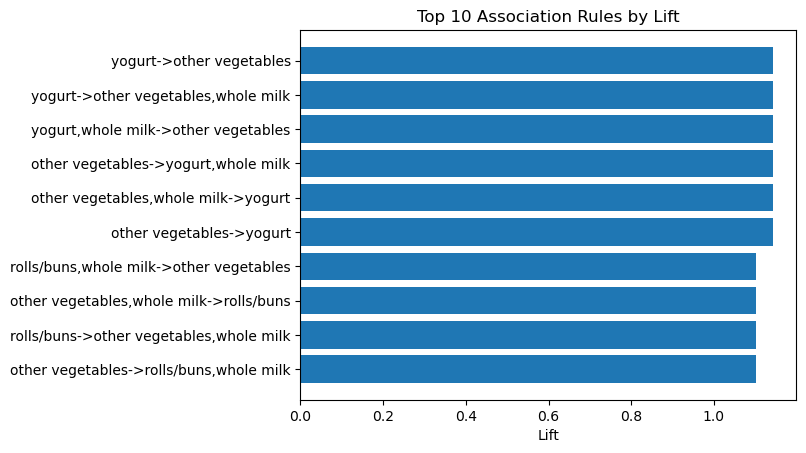

In [46]:
# Create a bar chart
plt.barh(range(len(top_rules)), top_rules['lift'], tick_label = top_rules['antecedents_str'] + '->' + top_rules['consequents_str'])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()